**ÉTAPE 0** : préparation des données

In [1]:
import process 
import pandas as pd
import numpy as np

# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DATA_Statapp.csv'
# Jerome path : 'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\DATA_Statapp.csv'
# Mohamed path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DATA_Statapp.csv'
df = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DATA_Statapp.csv')

# Apply conversion function to 'open' and 'close' columns
df['open'] = df['open'].apply(process.safe_literal_eval)
df['close'] = df['close'].apply(process.safe_literal_eval)

# Calculate returns for each line
df['return'] = df.apply(lambda row: [(close - open) / open for open, close in zip(row['open'], row['close'])], axis=1)

new_df = df[['ticker', 'return']] # create a new data frame with the column ticker and return 

# Créons le DataFrame à partir des listes dans 'return'
# On suppose ici que 'new_df' est déjà défini et contient la colonne 'return'

# Convertir chaque liste dans la colonne 'return' en plusieurs colonnes dans le nouveau DataFrame
returns_df = pd.DataFrame(new_df['return'].tolist())

# Ajouter la colonne 'ticker' du 'new_df' au début de 'returns_df'
returns_df.insert(0, 'ticker', new_df['ticker'])

# Renommer les colonnes pour refléter qu'elles sont des rendements
returns_df.columns = ['ticker'] + [f'return_{i}' for i in range(len(returns_df.columns) - 1)]

df_cleaned = process.remove_rows_with_nan(returns_df)
df_cleaned.reset_index(drop=True, inplace=True)

process.check_nan_inf(df_cleaned)

df_cleaned.set_index('ticker', inplace=True)

There are no NaN values in the dataframe


**ÉTAPE 1** : Phase d'entraînement et de construction (avec répétitions)

In [42]:
'''
--------------------------------------------------------------------------------------------------------------------
PARAMEERS
--------------------------------------------------------------------------------------------------------------------
'''

number_of_repetitions = 10
lookback_window = 365
number_of_clusters = 20
evaluation_window = 30
risk_free_rate = 0.04
clustering_method = 'signed_laplacian'


consolidated_W = process.consolidated_W(lookback_window=lookback_window, df_cleaned=df_cleaned, number_of_clusters=number_of_clusters, number_of_repetitions=number_of_repetitions, clustering_method=clustering_method)

portfolio_return = process.portfolio_annualized_returns(evaluation_window=evaluation_window, df_cleaned=df_cleaned, training_window=lookback_window, consolidated_W=consolidated_W)

SR, PNL = process.Sharpe_and_PnL(portfolio_annualized_returns=portfolio_return, risk_free_rate=risk_free_rate)


TypeError: consolidated_W() got an unexpected keyword argument 'clustering_method'

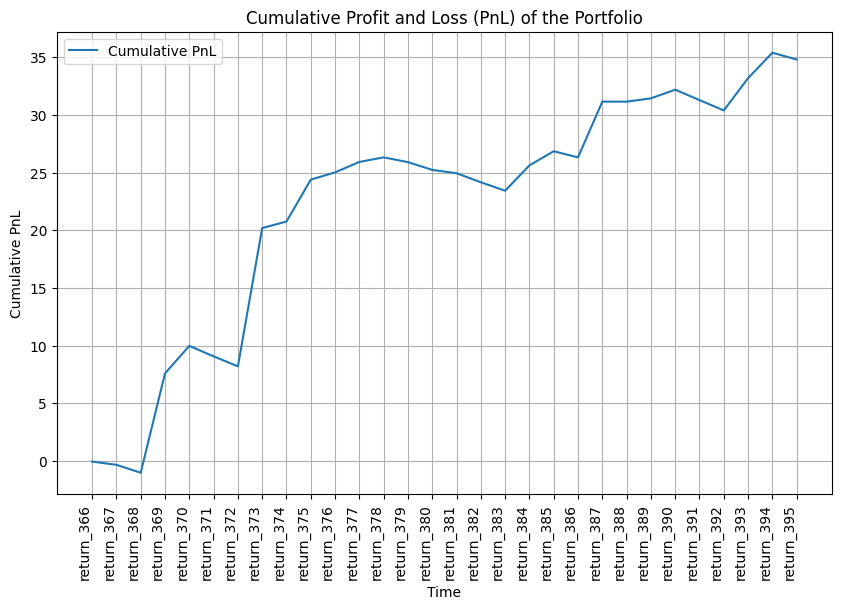

In [40]:
import matplotlib.pyplot as plt 

# Calcul du PnL cumulatif
cumulative_pnl = np.cumsum(portfolio_return)

# Tracé du PnL cumulatif
plt.figure(figsize=(10, 6))
plt.plot(cumulative_pnl, label='Cumulative PnL')
plt.title('Cumulative Profit and Loss (PnL) of the Portfolio')
plt.xlabel('Time')
plt.ylabel('Cumulative PnL')
plt.legend()
plt.grid(True)

plt.xticks(rotation=90, ha='right')

plt.show()



In [41]:
sharpe_ratio = np.mean(portfolio_return) / np.std(portfolio_return)
print(sharpe_ratio)
print(cumulative_pnl)

portfolio annualized return    0.404124
dtype: float64
            portfolio annualized return
return_366                    -0.041580
return_367                    -0.325032
return_368                    -1.007450
return_369                     7.599330
return_370                     9.984322
return_371                     9.076684
return_372                     8.207873
return_373                    20.191472
return_374                    20.755544
return_375                    24.385858
return_376                    25.017051
return_377                    25.919282
return_378                    26.316120
return_379                    25.903055
return_380                    25.230694
return_381                    24.941426
return_382                    24.159125
return_383                    23.426392
return_384                    25.621948
return_385                    26.845846
return_386                    26.312388
return_387                    31.144395
return_388               

/usr/local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning:

The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [6]:
import plotly.graph_objects as go


process.plot_PnL(SR=SR, PNL=PNL)